# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = "https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv"
df = pd.read_csv(data)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.shape

(48895, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#Looking for Duplicates removing id variable
duplicates = df.duplicated()
sum_duplicates = df.drop("id", axis = 1).duplicated().sum()

sum_duplicates


np.int64(0)

In [6]:
all_missing_values = df.isnull().sum()
only_missing_values_columns = all_missing_values[all_missing_values > 0]

only_missing_values_columns

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64

In [7]:
#Create column Names per type
column_types_df = df.dtypes.reset_index()
column_types_df.columns = ['column_name', 'data_type']

#Group by Data type
grouped_by_dtype = column_types_df.groupby('data_type')['column_name'].apply(list).reset_index()

#Add Count to each type
grouped_by_dtype['count'] = grouped_by_dtype['column_name'].apply(len)

grouped_by_dtype


,data_type,column_name,count
0,int64,"[id, host_id, price, minimum_nights, number_of...",7
1,float64,"[latitude, longitude, reviews_per_month]",3
2,object,"[name, host_name, neighbourhood_group, neighbo...",6


## Initial Findings Summary

There are a total of **48,895 rows** in the dataset, each representing a unique listing in New York City. 
The dataset contains **16 columns**, including location details, host information, pricing, availability, and review metrics.

Most columns are fully populated, but a few contain missing values:
- The *name* column is missing 16 entries.
- The *host_name* column is missing 21 entries.
- The *last_review* and *reviews_per_month* columns have 10,052 missing values, likely due to listings that haven't received any reviews.

The dataset includes:

- 7 numerical features (e.g., price, minimum_nights, number_of_reviews)
- 6 categorical features (e.g., name, host_name, neighbourhood_group, room_type)
- 3 float-type coordinates and metrics (latitude, longitude, reviews_per_month)

After checking for duplicates using df.duplicated(), the result was 0 duplicates, confirming that all rows are unique.

In [8]:
n_uniques = df.nunique()
n_uniques.reset_index()

,index,0
0,id,48895
1,name,47905
2,host_id,37457
3,host_name,11452
4,neighbourhood_group,5
5,neighbourhood,221
6,latitude,19048
7,longitude,14718
8,room_type,3
9,price,674


In [9]:
groups_neighbourhood = df.neighbourhood_group.value_counts().reset_index()
groups_neighbourhood

,neighbourhood_group,count
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


In [10]:
types_room = df.room_type.value_counts().reset_index()
types_room

,room_type,count
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


In [11]:
price_per_night = df.price.value_counts().sort_index().reset_index()
price_per_night

,price,count
0,0,11
1,10,17
2,11,3
3,12,4
4,13,1
...,...,...
669,7703,1
670,8000,1
671,8500,1
672,9999,3


In [12]:
reviews_count = df.number_of_reviews.value_counts().sort_index(ascending=False).reset_index()
reviews_count

,number_of_reviews,count
0,629,1
1,607,1
2,597,1
3,594,1
4,576,1
...,...,...
389,4,1994
390,3,2520
391,2,3465
392,1,5244


## Visualizations
### Areas of NYC that tend to be more expensive on Airbnb

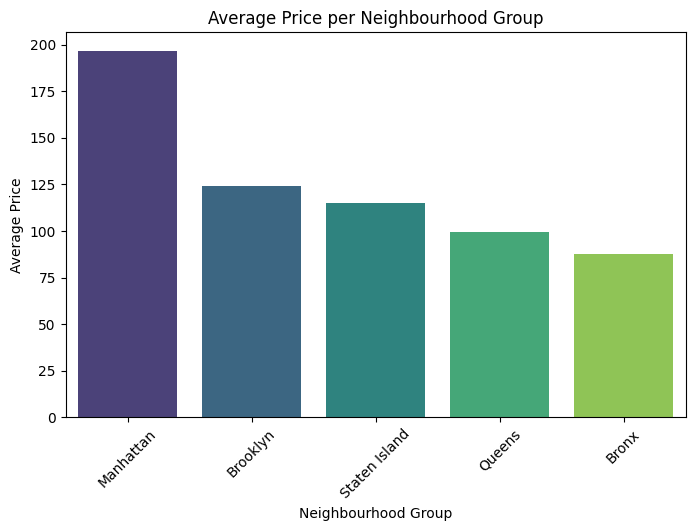

,neighbourhood_group,price
0,Manhattan,196.875814
1,Brooklyn,124.383207
2,Staten Island,114.812332
3,Queens,99.517649
4,Bronx,87.496792


In [13]:
avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price.index, y=avg_price.values, palette='viridis', hue=avg_price.index)
plt.title('Average Price per Neighbourhood Group')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()

avg_price.reset_index()

### Room Types variation by Neighbourhood Group

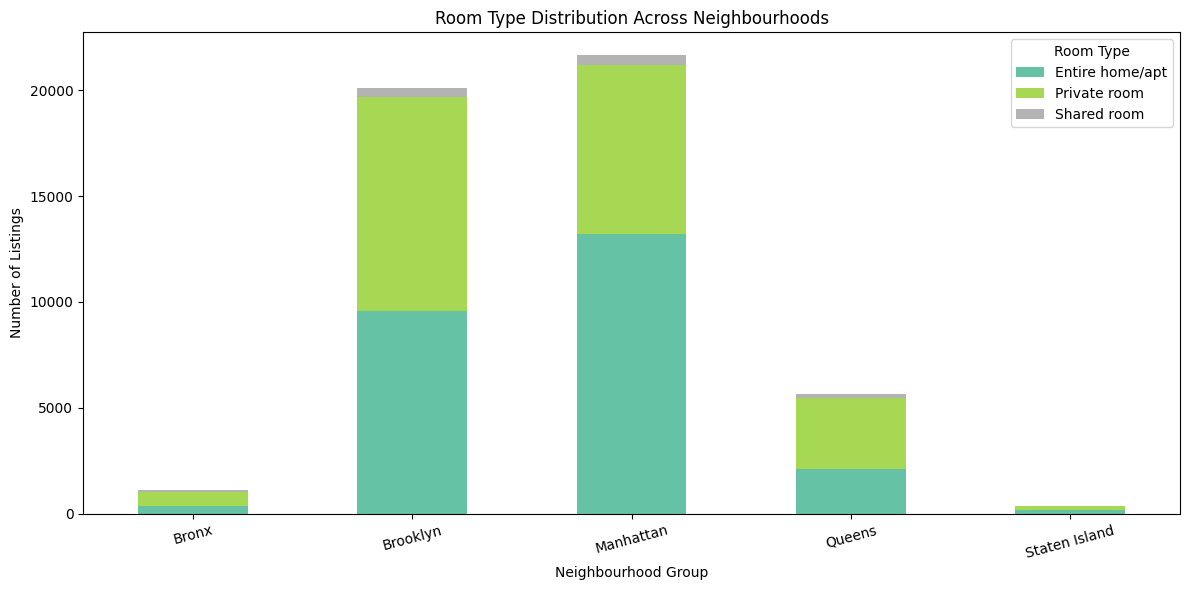

room_type,neighbourhood_group,Entire home/apt,Private room,Shared room
0,Bronx,379,652,60
1,Brooklyn,9559,10132,413
2,Manhattan,13199,7982,480
3,Queens,2096,3372,198
4,Staten Island,176,188,9


In [14]:
room_dist = df.groupby(['neighbourhood_group', 'room_type']).size().unstack().fillna(0)

room_dist.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Room Type Distribution Across Neighbourhoods')
plt.ylabel('Number of Listings')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation=15)
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

room_dist.reset_index()

## Pricing variations by Room type

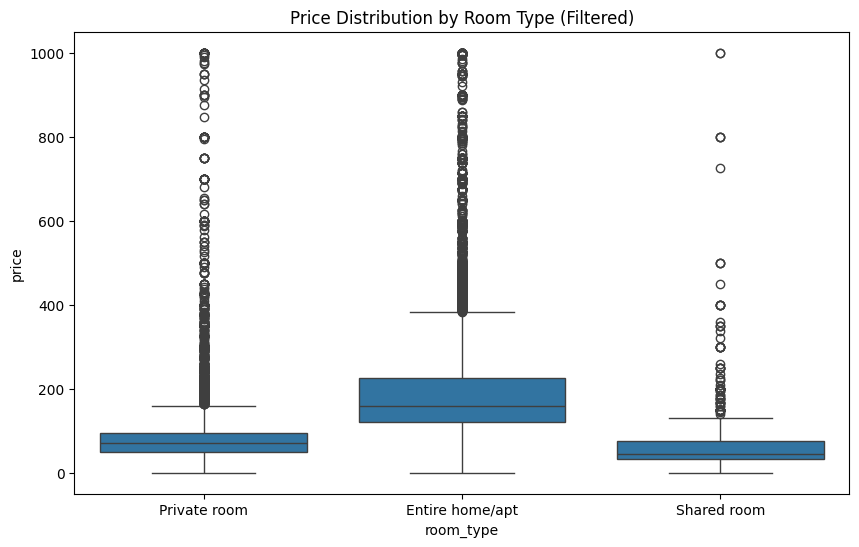

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48651,48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48652,48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48653,48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48654,48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [15]:
filtered_df = df[df['price'] <= 1000]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='room_type', y='price')
plt.title('Price Distribution by Room Type (Filtered)')
plt.show()

filtered_df.reset_index()

## Comparison of Average Prices Across Room Types

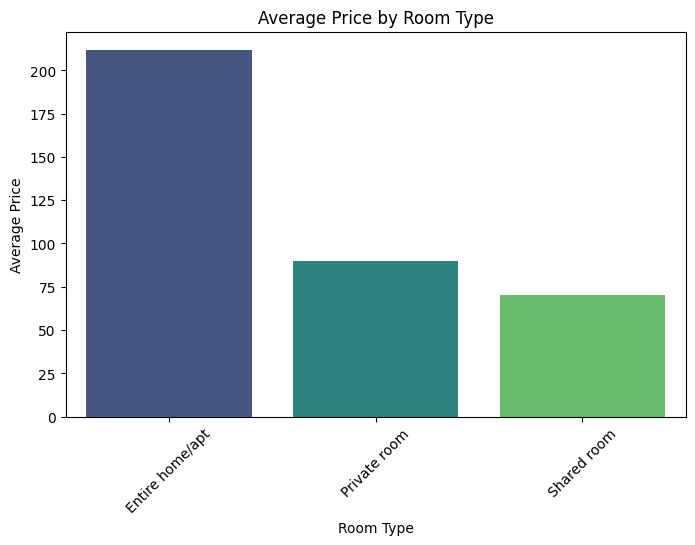

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


In [16]:
avg_price_room = df.groupby('room_type')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_room.index, y=avg_price_room.values, palette='viridis', hue=avg_price_room.index)
plt.title('Average Price by Room Type')
plt.ylabel('Average Price')
plt.xlabel('Room Type')
plt.xticks(rotation=45)
plt.show()

avg_price_room.reset_index()


### Do prices vary not just by room type, but also by neighborhood group?

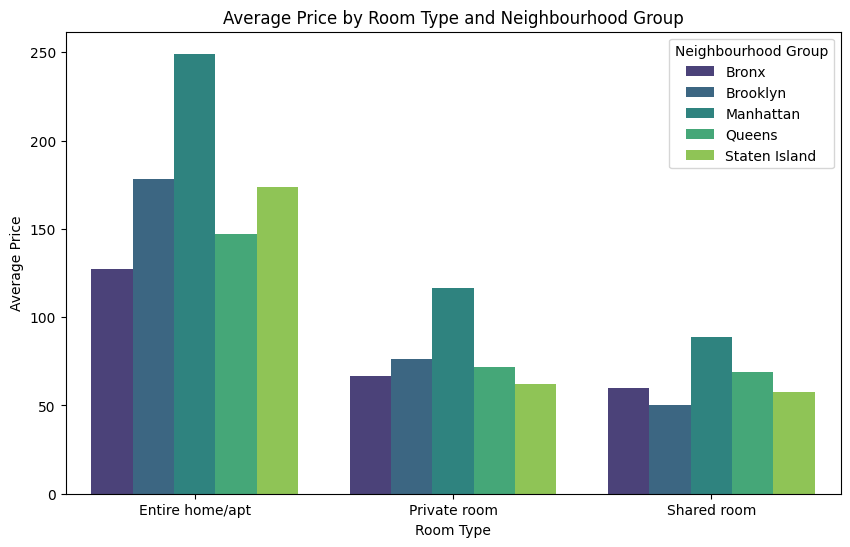

,index,room_type,neighbourhood_group,price
0,0,Entire home/apt,Bronx,127.506596
1,1,Entire home/apt,Brooklyn,178.327545
2,2,Entire home/apt,Manhattan,249.239109
3,3,Entire home/apt,Queens,147.050573
4,4,Entire home/apt,Staten Island,173.846591
5,5,Private room,Bronx,66.788344
6,6,Private room,Brooklyn,76.500099
7,7,Private room,Manhattan,116.776622
8,8,Private room,Queens,71.762456
9,9,Private room,Staten Island,62.292553


In [20]:
avg_price_combined = df.groupby(['room_type','neighbourhood_group'])['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_combined, x='room_type', y='price', hue='neighbourhood_group', palette='viridis')
plt.title('Average Price by Room Type and Neighbourhood Group')
plt.ylabel('Average Price')
plt.xlabel('Room Type')
plt.legend(title='Neighbourhood Group')
plt.show()

avg_price_combined.reset_index()